In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.axisartist.axislines import SubplotZero


plt.rcParams['figure.figsize'] = [10, 10]


def drawGraph(g, font='dejavu sans', arrow='->', layoutG=None):
    if not layoutG:
        layoutG = g

    sharedOpt = {
        'pos': nx.drawing.nx_agraph.graphviz_layout(layoutG, prog='dot'),
        'node_size': 2000
    }    
    
    nodeOpt = {
        **sharedOpt,
        'node_color': 'white',
        'node_shape': "o",
#         'clip_on': False,
#         'Rotate': False,
        'font_family': font
    }
    arrowHeadOpt = {
        **sharedOpt,
        'node_shape': "s",
        'edge_labels': nx.get_edge_attributes(g, 'text'),
        'width': 2,
        'arrowstyle': 'wedge',
        'arrowsize': 30
    }
    arrowTailOpt = {
        **arrowHeadOpt,
        'arrowstyle': arrow
    }

    with plt.xkcd():
        fig, ax = plt.subplots(1)
        ax.axis('off')

        ax = SubplotZero(fig, 111)
        fig.add_subplot(ax)
        plt.xticks([])
        plt.yticks([])

        ax.set_ylabel('go up')
        ax.set_xlabel('go right')

        for s in ['right', 'top']:
            ax.axis[s].set_visible(False)

        for s in ['bottom', 'left']:
            ax.axis[s].set_axisline_style("->")

        nx.drawing.draw_networkx_nodes(g, **nodeOpt)
        nx.drawing.draw_networkx_labels(g, **nodeOpt)

        edges = g.edges.data()

        heads = [e for e in edges if ('wedge' in e[2])]
        drawEdgesAndLabels(arrowHeadOpt, g, heads)

        tails = [e for e in edges if ('wedge' not in e[2])]
        drawEdgesAndLabels(arrowTailOpt, g, tails)


def drawEdgesAndLabels(options, g, list):
    nx.drawing.draw_networkx_edges(g, edgelist=list, arrows=True, **options)
    nx.drawing.draw_networkx_edge_labels(g, edgelist=list, **options)

# Generalizing Convolutions

## Overview

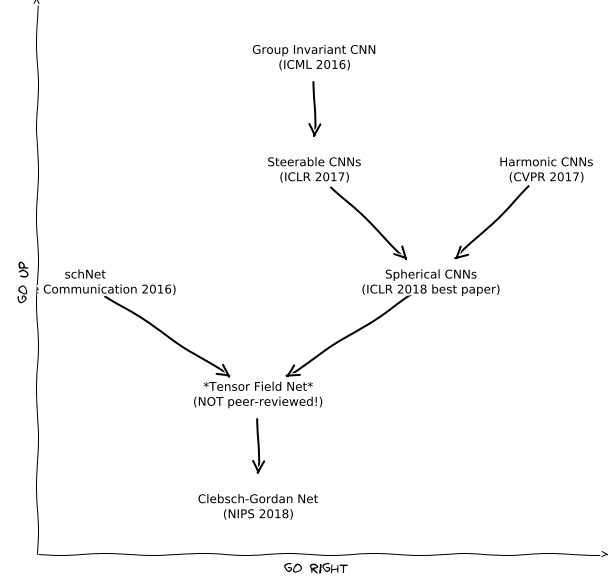

In [9]:


g = nx.DiGraph(directed=True)

schNet = "schNet\n(Nature Communication 2016)"
groupInv = "Group Invariant CNN\n(ICML 2016)"
steerable = "Steerable CNNs\n(ICLR 2017)"
harmonic = "Harmonic CNNs\n(CVPR 2017)"
spherical = "Spherical CNNs\n(ICLR 2018 best paper)"
tensorField = "*Tensor Field Net*\n(NOT peer-reviewed!)"
clebNet = "Clebsch-Gordan Net\n(NIPS 2018)"

g.add_edge(schNet, tensorField)
g.add_edge(groupInv, steerable)
g.add_edge(harmonic, spherical)
g.add_edge(steerable, spherical)
g.add_edge(spherical, tensorField)
g.add_edge(tensorField, clebNet)

drawGraph(g)

plt.show()

## Pre-ConvNet

1960-1987

[Eternal winter covers the land]

## Pre-ConvNet - Fully Connected Layers

In pursuing of unbounded representation power


\begin{align}
& \text{(let $w$ be the weight function)} & f_+(x) &= \phi \Bigg( \int_{\text{Manifold}} f(x) w(x, y) dx \Bigg) \\
& \text{(pardon me for abusing notation a bit)} & &= \phi \Bigg( < f(x), w(x, y) > dx \Bigg)
\end{align}

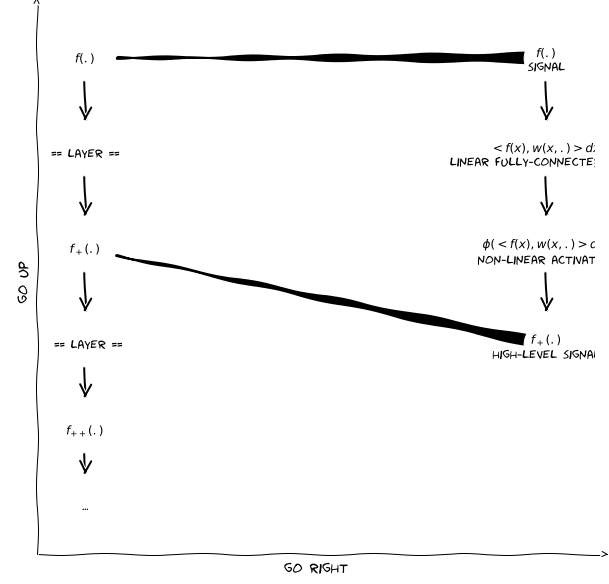

In [15]:


g = nx.DiGraph(directed=True)


g.add_edge("$f(.)$", "== layer ==")
g.add_edge("== layer ==", "$f_+(.)$")
g.add_edge("$f_+(.)$", " == layer ==")
g.add_edge(" == layer ==", "$f_{++}(.)$")
g.add_edge("$f_{++}(.)$", "...")

dot = "$f(.)$\nsignal"
fc = "$<f(x), w(x, .)> d x$\nlinear fully-connected dense"
nl = "$\phi(<f(x), w(x, .)> d x)$\nnon-linear activation"
dot2 = "$f_+(.)$\nhigh-level signal"
# hw = "highway?"

g.add_edge(dot, fc)
g.add_edge(fc, nl)
g.add_edge(nl, dot2)

g2 = g.copy()

g2.add_edge(dot, "$f(.)$", wedge=True)
g2.add_edge(dot2, "$f_+(.)$", wedge=True)

# g.add_edge(dot, hw)
# g.add_edge(hw, dot2)

drawGraph(g2,font='humor sans',  layoutG=g)

plt.show()

## Pre-ConvNet - Fully Connected Layers

Considerably weak in today's standard
- e.g. easily confused by turning its head

## Invariant Layer / Bag of Features?

(DON'T DO THIS)

[picasso effect]

## Data Augmentation

[insert example pictures]

- Sounds like in the right direction
    - maybe a bit slow in practice
    - even in convex case SGD "theoretically probably" converges equally fast
    - but it works fines
- Wait a second, how about a better idea?

## Data Augmentation

- is a higher-order function$*$, specifically, a unary (arity=1) operator: $A_{ug} \circ f(.)$
    - (as in "Laplace operator" & "operator overloading")

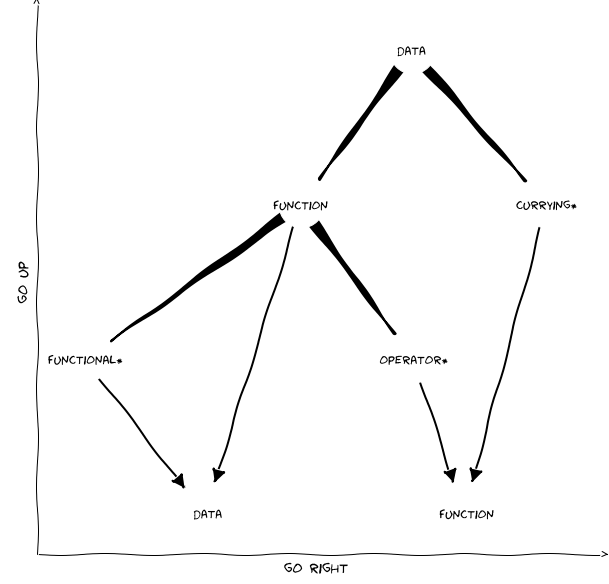

In [11]:


g = nx.DiGraph(directed=True)

n = 'data'
n2 = ' data'
f = 'function'
f2 = ' function'
o = 'operator*'
c = 'currying*'
fl = 'functional*'

g.add_nodes_from([n])
g.add_nodes_from([f, fl, o, c])
g.add_nodes_from([n2, f2])

g.add_edge(n, f, wedge=True)
g.add_edge(f, n2)
g.add_edge(f, o, wedge=True)
g.add_edge(o, f2)
g.add_edge(f, fl, wedge=True)
g.add_edge(fl, n2)
g.add_edge(n, c, wedge=True)
g.add_edge(c, f2)

drawGraph(g, font='humor sans', arrow='-|>')

plt.show()

In [12]:
list(map(lambda x: x*x, range(1, 5))) # Map: (R -> R) -> (R^n -> R^n)

[1, 4, 9, 16]

- can be applied to each operand of a multivariable function individually (again, pardon for abuse of notation):

$$
A_{ug}|_{x} \circ U_{ag}|_{y} \circ w(x, y) = U_{ag}|_{y} \circ A_{ug}|_{x} \circ w(x, y)
$$

## Data Augmentation

Is very situational:
    
- With gravity vs without gravity

- [insert pictures]

## Data Augmentation

Is very situational:
    
- Fixed air pressure vs dependent air pressure

- [Insert pictures]

## Data Augmentation - Equivariance

Hypothesis 1: Should be applicable to any layer

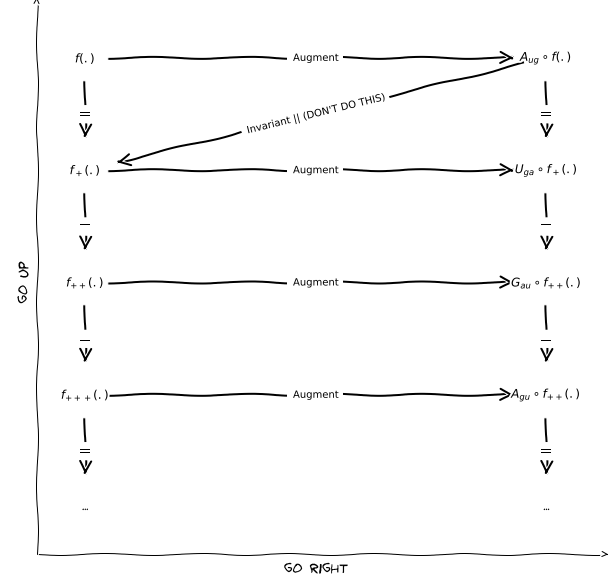

In [13]:


g = nx.DiGraph(directed=True)


fs = [
    "$f(.)$",
    "$f_+(.)$",
    "$f_{++}(.)$",
    "$f_{+++}(.)$",
    "..."
]


afs = [
    "$A_{ug} \circ f(.)$",
    "$U_{ga} \circ f_+(.)$",
    "$G_{au} \circ f_{++}(.)$",
    "$A_{gu} \circ f_{++}(.)$",
    " ... "
]

for i in range(0, 4):
    g.add_edge(fs[i], fs[i + 1], text='||')
    g.add_edge(afs[i], afs[i + 1], text='||')
#     g.add_edge(fs[i], afs[i])

g2 = g.copy()

for i in range(0, 4):
    g2.add_edge(fs[i], afs[i], text='Augment')
    
g2.add_edge(afs[0], fs[1], text='Invariant || (DON\'T DO THIS)')

drawGraph(g2,font='humor sans',  layoutG=g)

plt.show()

## Data Augmentation - Similarity

Hypothesis 2:

$$
<f_1(x), f_2(x)> dx = k <A_{ug} \circ f_1(x), A_{ug} \circ f_2(x)> dx
$$

OR: inner-product preserving (isometry) + scaling
    (I know it sounds even worse, please don't judge me)

## Data Augmentation

- linear fully-connected dense

\begin{align}
& & U_{ga} \circ f_+(y) &= <A_{ug} \circ f(x), w(x, y)> dx \\
\\
& \Longrightarrow & <f(x), w(x, U_{ga} y)> dx = f_+(U_{ga} y) &= <f(A_{ug} x), w(x, y)> dx \\
\text{(rotate simultaneously)} & & &= <f(x), w(A_{ug}^{-1} x, y)> dx \\
\text{(let $z = U_{ga} y$)   } \\
& \Longrightarrow & <f(x), w(x, z)> dx &= <f(x), w(A_{ug}^{-1} x, U_{ga}^{-1} z)> dx \\
\\
& \Longrightarrow & w(x, z) &= w(A_{ug}^{-1} x, U_{ga}^{-1} z) \\
\end{align}

- now assuming that there is a CONST reference pixel $z_0$
    - ... that can be augmented by $\bar{U}_{ga}$ to be moved to any other point $z = \bar{U}_{ga} z_0$:

\begin{align}
& & f_+(z) &= <f(x), w(x, z)> dx = <f(x), w(x, \bar{U}_{ga} z_0)> dx \\
& & &= <f(x), w(\bar{A}_{ug}^{-1} x, \bar{U}_{ga}^{-1} \bar{U}_{ga} z_0)> dx \\
& & &= <f(\bar{A}_{ug} x), w(x, z_0)> dx = <f(\bar{A}_{ug} x), w_0(x)> dx
\end{align}

- looks familiar yet?

$$
conv(f(- .), w_0(.)) = corr(f(.), w_0(.)) = \int_{\text{Manifold}} f(. + x) w_0(x) d x = <f(. + x), w_0(x)> d x
$$

- now assuming that there is a CONST reference pixel $z_0$
    - ... that can be augmented by $\bar{U}_{ga}$ to be moved to any other point $z = \bar{U}_{ga} z_0$:

\begin{align}
& & f_+(z) &= <f(x), w(x, z)> dx = <f(x), w(x, \bar{U}_{ga} z_0)> dx \\
& & &= <f(x), w(\bar{A}_{ug}^{-1} x, \bar{U}_{ga}^{-1} \bar{U}_{ga} z_0)> dx \\
& & &= <f(\bar{A}_{ug} x), w(x, z_0)> dx = <f(\bar{A}_{ug} x), w_0(x)> dx
\end{align}

- looks familiar yet?

$$
conv(f(- .), w_0(.)) = corr(f(.), w_0(.)) = \int_{\text{Manifold}} f(. + x) w_0(x) d x = <f(. + x), w_0(x)> d x
$$

## Glossary

- A monoid is anything compatible with MapReduce

```python
apple.merge(pen).merge(pineapple).merge(pen).merge(face).merge(palm) =
apple.merge(pen)                    # core 1
  .merge(pineapple.merge(pen))      # core 2
  .merge(face.merge(palm))          # core 3
```

## Glossary

- A group member is an invertible monoid

```python
pineapplepen.merge(-pen) = pineapple
```

A commutative (Abelian) monoid/group member is an monoid i which order of reduce doesn't matter

```python
pineapple.merge(pen) = pen.merge(pineapple)
```

## Glossary

- Higher-order function (a.k.a. operator) is 
- Group action is an operator that is also a group member



## What is conv? (actually cross-correlation)

assuming f_1, f_2: (F = R^n => S)

defined for an operator A: F => F

conv(f_1, f_2)(A) = <f_1(x), A {f_2(x)}> dx: (F => F) => S

The common assumption is that operator A can be broken into left AL and right AR:

A {f(x)} = AL(f(AR(x)))

## How does it help? - Equivariance

... define equivariance